# Predicting Global Happiness 

## Introduction

## Data Preprocessing

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [2]:
# Load the dataset
df = pd.read_csv('./dataset/dataset.csv')

# Display the first few rows of the dataset
display(df.head())

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [4]:
# Display summary statistics of the dataset
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


In [5]:
# Drop rows with nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1365 non-null   object 
 1   region                        1365 non-null   object 
 2   happiness_score               1365 non-null   float64
 3   gdp_per_capita                1365 non-null   float64
 4   social_support                1365 non-null   float64
 5   healthy_life_expectancy       1365 non-null   float64
 6   freedom_to_make_life_choices  1365 non-null   float64
 7   generosity                    1365 non-null   float64
 8   perceptions_of_corruption     1365 non-null   float64
 9   year                          1365 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB


## Exploratory Data Analysis

### 1.1 Checking the Distribution of the data

<Axes: >

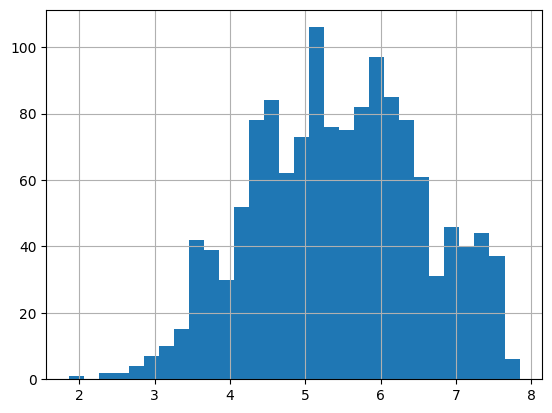

In [6]:
# Visualize the distribution of the target variable
df['happiness_score'].hist(bins=30)

<br><br>

### 1.2 Correlation Analysis

<Axes: >

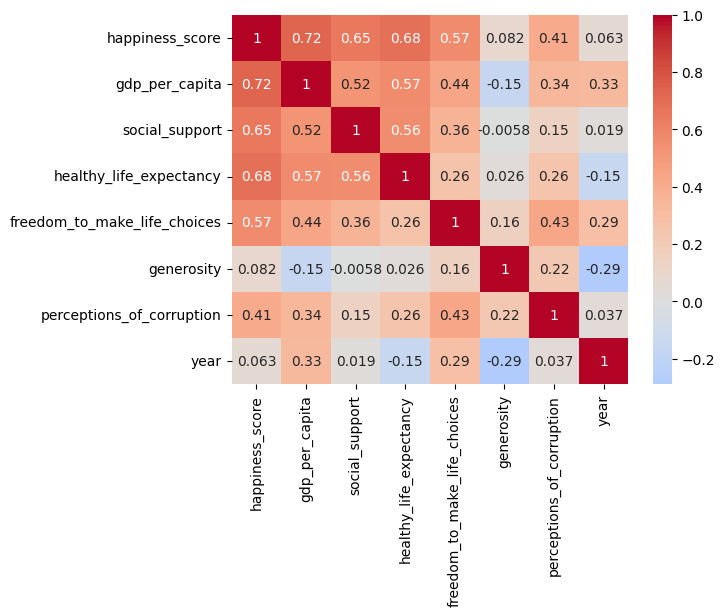

In [7]:
# Correlation heatmap
# Keep only numeric columns for correlation analysis
sns.heatmap(df.select_dtypes("number").corr(),
            annot=True, cmap="coolwarm", center=0)

<br><br>

### 1.3 Pairwise Scatterplots

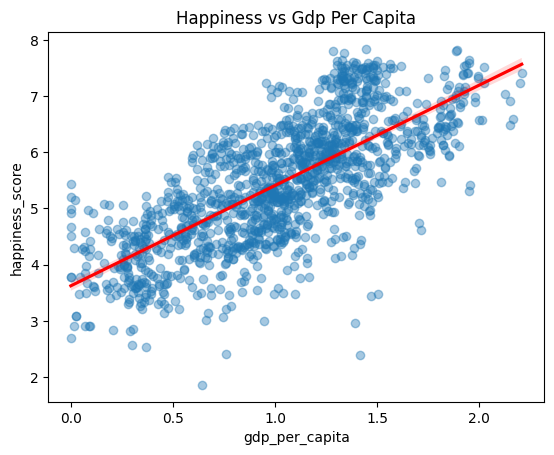

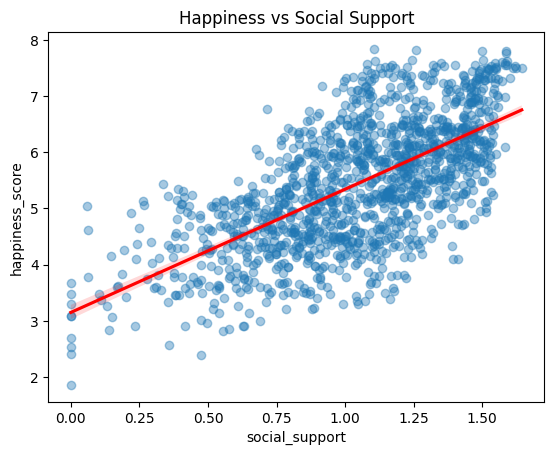

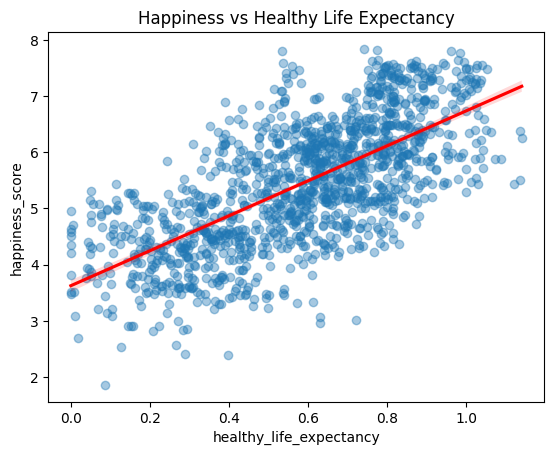

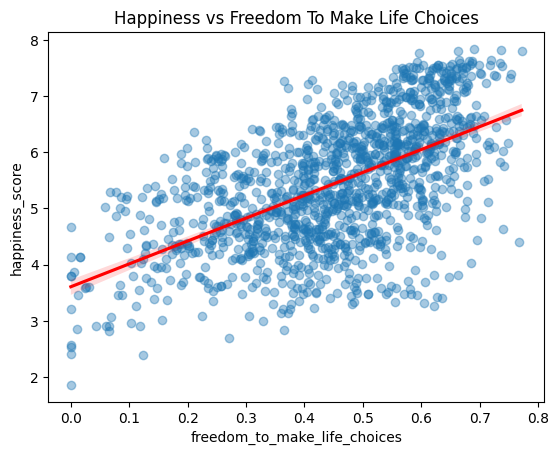

In [8]:
# Scatterplots with regression lines
for feature in ["gdp_per_capita","social_support",
                "healthy_life_expectancy","freedom_to_make_life_choices"]:
    sns.regplot(x=feature, y="happiness_score", data=df,
                scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f"Happiness vs {feature.replace('_',' ').title()}")
    plt.show()

1. Distribution (Histogram)
    - Most countries cluster between 4 and 7 happiness score.
    - Very few extremely low (<3) or extremely high (>7.5) scores.

2. Correlation Heatmap
    - Strongest drivers:
        - GDP per capita (0.72)
        - Healthy life expectancy (0.68)
        - Social support (0.65)
    - Medium driver:
        - Freedom to make life choices (0.57)
    - Weak drivers:
        - Perceptions of corruption (0.42)
        - Generosity (0.08, almost no correlation)
    - Year has weak correlation (0.06), meaning happiness didn’t strongly trend up/down globally overall.

3. Scatterplots with Regression Lines
    - GDP, Social Support, Life Expectancy, Freedom → clear positive slopes.
    - Generosity & corruption (not shown here) → weaker/noisy trends.

<br><br>

### 1.4 Time Trends


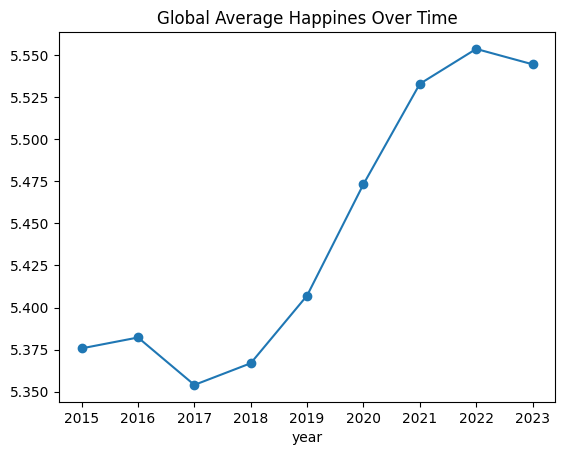

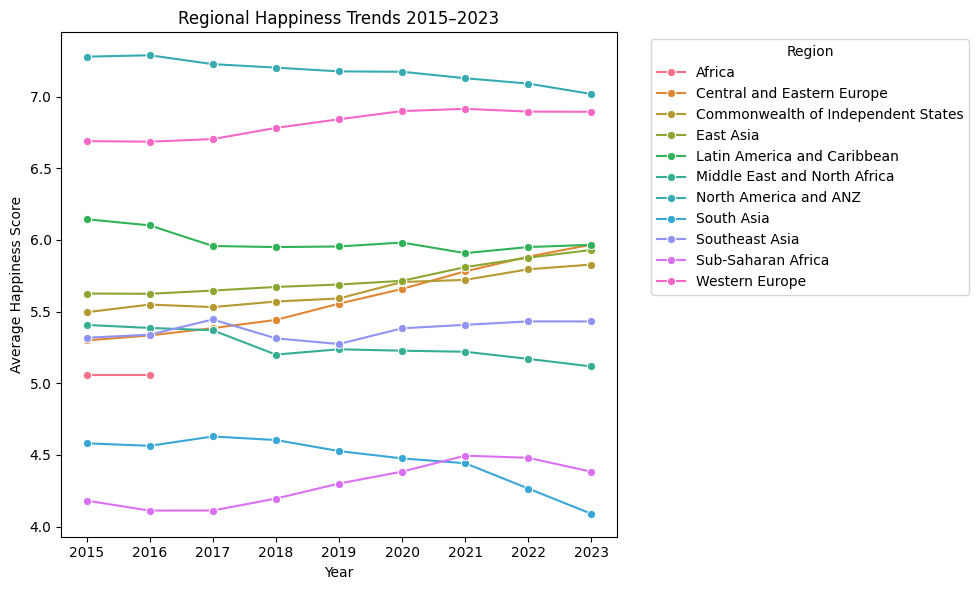

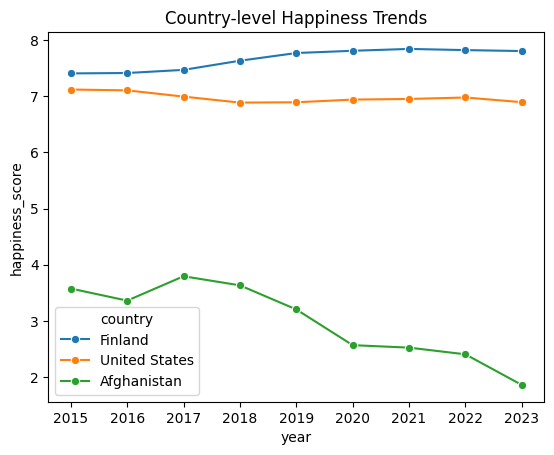

In [9]:
# Glboal trend
global_trend = df.groupby('year')["happiness_score"].mean()
global_trend.plot(marker='o', title="Global Average Happines Over Time")


# Regional trends
region_trends = df.groupby(["year","region"])["happiness_score"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="happiness_score", hue="region", data=region_trends, marker="o")

plt.title("Regional Happiness Trends 2015–2023")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Example country trends
country_trends = df[df['country'].isin(["Finland", "United States", "Afghanistan"])]
sns.lineplot(x="year", y="happiness_score", hue="country", data=country_trends, marker='o')
plt.title("Country-level Happiness Trends")
plt.show()
                                        

1. Global Average (2015–2023)
    - Pretty stable overall: ~5.35 → ~5.55.
    - Small dip in 2017, strong recovery after 2019, peaking in 2022.

2. Regional Trends (from before, once legend fixed)
    - Western Europe & North America/ANZ consistently top.
    - Sub-Saharan Africa & South Asia consistently lowest.
    - Some mid-tier regions (Latin America, Eastern Europe) show mild fluctuations.

3. Country Trends
    - Finland steadily rising → consistently #1 since ~2018.
    - United States flat/slight decline → hovering ~7.0.
    - Afghanistan sharp decline post-2017 → now the lowest globally.

<br><br>

### 1.5 Ranking

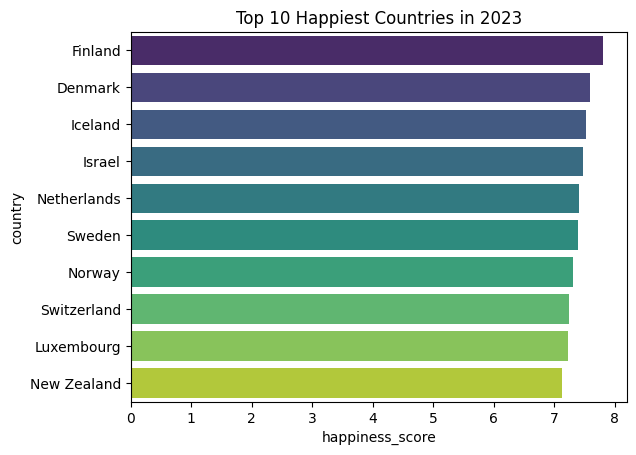

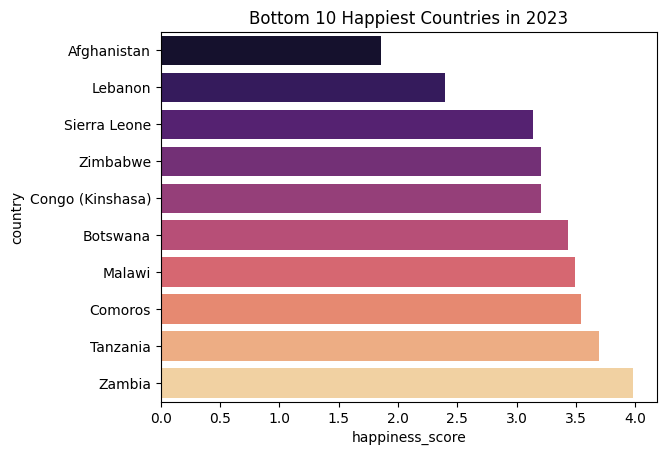

In [10]:
# Top 10 happiest countries lastest year
latest_year = df['year'].max()
top10 =df[df['year']==latest_year].nlargest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=top10, hue="country", dodge=False, legend=False, palette="viridis")
plt.title(f"Top 10 Happiest Countries in {latest_year}")
plt.show()

# Bottom 10 happiest countries lastest year
bottom10 =df[df['year']==latest_year].nsmallest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=bottom10, hue="country", dodge=False, legend=False, palette="magma")
plt.title(f"Bottom 10 Happiest Countries in {latest_year}")
plt.show()



### Top 10 Happiess Countries for 2023:
- Finland is clearly the topest(score ~7.5)
- Denmark and Iceland are following it (score ~7.3 and ~7.4)

### Bottom 10 Happiess Countries for 2023:
- Afghanistan is clearly the lowest (score ~1.9).
- Several Sub-Saharan African countries dominate the bottom of the list.
- Lebanon also shows up very low, reflecting its recent crises.<br><br>

<br><br>

## Exploratory Data Analysis (EDA) Summary

### 1. Distribution of Happiness Scores
- Happiness scores (2015–2023) range between **~2 and ~8**.
- The majority of countries fall between **4 and 7**.
- Very few countries achieve extremely low or extremely high scores.


### 2. Correlation Insights
- **GDP per capita (0.72)**, **social support (0.65)**, and **healthy life expectancy (0.68)** show the strongest positive correlation with happiness.
- **Freedom to make life choices (0.57)** also has a significant positive correlation.
- **Generosity (0.08)** has a weak correlation with happiness.
- **Perceptions of corruption (0.41)** shows moderate correlation.
- Year itself has very low correlation, meaning global scores are fairly stable.



### 3. Key Relationships
- **Happiness increases** with higher GDP, stronger social support, longer healthy life expectancy, and greater freedom of choice.
- Scatter plots confirm clear **positive linear trends** for these key features.



### 4. Regional Analysis
- **Western Europe, North America, and ANZ** report the **highest average happiness**.
- **Sub-Saharan Africa and South Asia** consistently have **lower scores**.
- Regional happiness is relatively stable over time, with **Western Europe leading**.


### 5. Country-Level Trends
- **Finland** remains the happiest country with consistently high scores since 2015.
- **United States** shows stable but slightly lower scores (~6.8–7.1).
- **Afghanistan** ranks the lowest, with a sharp decline after 2018.



### 6. Top & Bottom Countries in 2023
- **Top 10 Happiest Countries:** Finland, Denmark, Iceland, Israel, Netherlands, Sweden, Norway, Switzerland, Luxembourg, New Zealand.
- **Bottom 10 Happiest Countries:** Afghanistan, Lebanon, Sierra Leone, Zimbabwe, Congo (Kinshasa), Botswana, Malawi, Comoros, Tanzania, Zambia.



### 7. Global Happiness Trend
- Global average happiness is **stable around 5.3–5.5**.
- A slight increase is visible after 2018, peaking around 2022.



### Key Takeaways
- Economic prosperity (**GDP per capita**) and social well-being (**support, health, freedom**) are the most critical drivers of happiness.
- Regions differ significantly, highlighting inequalities.
- Despite yearly variations, **global happiness levels remain stable**.


## Model Training

### Split dataset into train years and test year

In [11]:
# Train = 2015–2022, Test = 2023
train = df['year'] < 2023
test = df['year'] == 2023

X_train = df[train].drop(columns=['country', 'region', 'year', 'happiness_score'])
y_train = df[train]['happiness_score']

X_test = df[test].drop(columns=['country', 'region', 'year', 'happiness_score'])
y_test = df[test]['happiness_score']

### Define TimeSeriesSplit (for cv)

In [12]:
# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 

### Dummy Baseline

In [13]:
# Create and train a Dummy Regressor model
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

# Predict using the Dummy Regressor model
y_pred_dummy = dummy.predict(X_test)

# Evaluate Dummy Regressor model
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mse_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

# Display Dummy Regressor evaluation metrics
print("\nDummy Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_dummy:.2f}")
print(f"Mean Squared Error (MSE): {mse_dummy:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dummy:.2f}")
print(f"R-squared (R²): {r2_dummy:.2f}")


Dummy Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.94
Mean Squared Error (MSE): 1.31
Root Mean Squared Error (RMSE): 1.14
R-squared (R²): -0.01


### Sanity Check - Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Display Linear Regression evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R-squared (R²): {r2_lr:.2f}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.30
Root Mean Squared Error (RMSE): 0.55
R-squared (R²): 0.77


### Decision Tree Regressor Model

I build a Decision Tree Regression model to see if the data had any non-linear patterns or feature interactions. While it didn't do better than the sanity model - linear regression, it gave a useful insights into which factors matters most and confirmed that the relationships are mostly linear. 

In [15]:
# Define the parameter grid
param_grid_dtr = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["squared_error", "friedman_mse"],
    "ccp_alpha": [0.0, 0.01, 0.05]
}

# Initialize the model
dtr = DecisionTreeRegressor(random_state=7)

# GridSearchCV setup
grid_dtr = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid_dtr,
    scoring='r2', 
    cv=tscv,
    n_jobs=-1,         
    verbose=2
)

# Fit to training data
grid_dtr.fit(X_train, y_train)

# Best estimator from GridSearchCV
best_dtr = grid_dtr.best_estimator_

# Best parameters from GridSearchCV
print("Best Hyperparameters:", grid_dtr.best_params_)

# Predict using the best Decision Tree Regressor model
y_pred_dtr = best_dtr.predict(X_test)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

# Display Decision Tree Regressor evaluation metrics after hyperparameter tuning
print("\nTuned Decision Tree Regressor Model Evaluation:")
print("Best Cross-Validation R²:", grid_dtr.best_score_)
print(f"Mean Absolute Error (MAE): {mae_dtr:.2f}")
print(f"Mean Squared Error (MSE): {mse_dtr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dtr:.2f}")
print(f"R-squared (R²): {r2_dtr:.2f}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}

Tuned Decision Tree Regressor Model Evaluation:
Best Cross-Validation R²: 0.6315163734907756
Mean Absolute Error (MAE): 0.75
Mean Squared Error (MSE): 0.90
Root Mean Squared Error (RMSE): 0.95
R-squared (R²): 0.31


### Light GBM Regressor

In [16]:
# Define the parameter grid
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10, -1],
    'num_leaves': [20, 31, 50],
    'min_data_in_leaf': [10, 20, 50],
}

# Initialize the model
lgbm = LGBMRegressor(random_state=7)

# GridSearchCV setup
grid_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    scoring='r2', 
    cv=tscv,
    n_jobs=-1,         
    verbose=2
)

# Fit to training data
grid_lgbm.fit(X_train, y_train)

# Best estimator from GridSearchCV
best_lgbm = grid_lgbm.best_estimator_

# Best parameters from GridSearchCV
print("Best Hyperparameters:", grid_lgbm.best_params_)

# Predict using the best Light GBM Regressor model
y_pred_lgbm = best_lgbm.predict(X_test)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Display Light GBM Regressor evaluation metrics after hyperparameter tuning
print("\nTuned Light GBM Regressor Model Evaluation:")
print("Best Cross-Validation R²:", grid_lgbm.best_score_)   
print(f"Mean Absolute Error (MAE): {mae_lgbm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm:.2f}")
print(f"R-squared (R²): {r2_lgbm:.2f}")


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1229, number of used features: 6
[LightGBM] [Info] Start training from score 5.428998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

### XGBoost Regressor model

In [17]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
}

# Initialize the model
xgb = XGBRegressor(random_state=7)

# GridSearchCV setup
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='r2', 
    cv=tscv,
    n_jobs=-1,         
    verbose=2
)

# Fit to training data
grid_xgb.fit(X_train, y_train)

# Best estimator from GridSearchCV
best_xgb = grid_xgb.best_estimator_

# Best parameters from GridSearchCV
print("Best Hyperparameters:", grid_xgb.best_params_)

# Predict using the best XGBoost Regressor model
y_pred_xgb  = best_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb= np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display XGBoost Regressor evaluation metrics after hyperparameter tuning
print("\nTuned XGBoost Regressor Model Evaluation:")
print("Best Cross-Validation R²:", grid_xgb.best_score_)
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.6}

Tuned XGBoost Regressor Model Evaluation:
Best Cross-Validation R²: 0.7149234046482041
Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 0.74
Root Mean Squared Error (RMSE): 0.86
R-squared (R²): 0.43


### CatBoost Regressor

In [18]:
# Initialize CatBoost 
cat = CatBoostRegressor(
    random_state=7,
    verbose=0, 
    loss_function='RMSE'
)

# Define parameter grid for RandomizedSearchCV
param_dist_cat = {
    'iterations': [200, 400, 600, 800],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 0.5, 1, 5],
    'border_count': [32, 64, 128],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'random_strength': [1, 5, 10, 20]
}

# RandomizedSearchCV 
random_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist_cat,
    n_iter=30,             
    scoring='r2',
    cv=tscv,
    random_state=7,
    n_jobs=-1,
    verbose=2
)

# Fit to training data
random_cat.fit(X_train, y_train)

# Best estimator
best_cat = random_cat.best_estimator_

# Best params
print("Best Hyperparameters:", random_cat.best_params_)

# Predictions
y_pred_cat = best_cat.predict(X_test)

# Evaluation metrics
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print("\nTuned CatBoost Regressor Model Evaluation:")
print("Best Cross-Validation R²:", random_cat.best_score_)
print(f"Mean Absolute Error (MAE): {mae_cat:.2f}")
print(f"Mean Squared Error (MSE): {mse_cat:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cat:.2f}")
print(f"R-squared (R²): {r2_cat:.2f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.7, 'random_strength': 5, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 800, 'depth': 6, 'border_count': 128, 'bagging_temperature': 5}

Tuned CatBoost Regressor Model Evaluation:
Best Cross-Validation R²: 0.7328895935490687
Mean Absolute Error (MAE): 0.55
Mean Squared Error (MSE): 0.44
Root Mean Squared Error (RMSE): 0.66
R-squared (R²): 0.66


### Scaling

In [19]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

### Ridge Regression

In [20]:
# Initialize Ridge Regression
ridge = Ridge(random_state=7)

# Define Ridge parameter grid
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

# GridSearchCV setup
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    scoring='r2',
    cv=tscv,
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_ridge.fit(X_train_scaled, y_train)

# Best estimator from GridSearchCV
best_ridge = grid_ridge.best_estimator_

# Best parameters from GridSearchCV
print("Best Hyperparameters:", grid_ridge.best_params_)

# Predict using the best Ridge Regression model
y_pred_ridge = best_ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display Ridge Regression evaluation metrics after hyperparameter tuning
print("\nTuned Ridge Regression Model Evaluation:")
print("Best Cross-Validation R²:", grid_ridge.best_score_)
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R²): {r2_ridge:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'alpha': 100.0, 'solver': 'svd'}

Tuned Ridge Regression Model Evaluation:
Best Cross-Validation R²: 0.7059768974462424
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.30
Root Mean Squared Error (RMSE): 0.54
R-squared (R²): 0.77


### Lasso Regression

In [21]:
# Initialize Lasso
lasso = Lasso(random_state=7, max_iter=5000)

# Define hyperparameter grid 
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
}

# GridSearchCV setup
grid_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    scoring='r2',
    cv=tscv,
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_lasso.fit(X_train_scaled, y_train)

# Best model
best_lasso = grid_lasso.best_estimator_

# Predict on test data
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Evaluate
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display Ridge Regression evaluation metrics after hyperparameter tuning
print("\nTuned Lasso Regression Model Evaluation:")
print("Best Cross-Validation R²:", grid_lasso.best_score_)
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R²): {r2_lasso:.2f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits

Tuned Lasso Regression Model Evaluation:
Best Cross-Validation R²: 0.6464901531388978
Mean Absolute Error (MAE): 0.42
Mean Squared Error (MSE): 0.34
Root Mean Squared Error (RMSE): 0.58
R-squared (R²): 0.74


In [22]:
results = []

# Dummy 
results.append(["Dummy", r2_dummy, mae_dummy, rmse_dummy])

# Linear Regression
results.append(["Linear Regression", r2_lr, mae_lr, rmse_lr])

# Lasso Regression
results.append(["Lasso", r2_lasso, mae_lasso, rmse_lasso])

# Ridge Regression
results.append(["Ridge", r2_ridge, mae_ridge, rmse_ridge])

# Decision Tree Regression
results.append(["Decision Tree", r2_dtr, mae_dtr, rmse_dtr])

# CatBoost Regression
results.append(["CatBoost", r2_cat, mae_cat, rmse_cat])

# Light GBM Regression
results.append(["Light GBM", r2_lgbm, mae_lgbm, rmse_lgbm])

# XGBoost Regression
results.append(["XGBoost", r2_xgb, mae_xgb, rmse_xgb])

# Create DataFrame
df_results = pd.DataFrame(results, columns=["Model", "R2", "MAE", "RMSE"])
print(df_results.sort_values("R2", ascending=False))


               Model        R2       MAE      RMSE
3              Ridge  0.771302  0.383767  0.544520
1  Linear Regression  0.765671  0.394224  0.551184
2              Lasso  0.739888  0.419907  0.580715
5           CatBoost  0.659352  0.553103  0.664563
6          Light GBM  0.549263  0.651062  0.764442
7            XGBoost  0.425900  0.734303  0.862734
4      Decision Tree  0.308879  0.753018  0.946586
0              Dummy -0.010279  0.941324  1.144468
